In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sc
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### Opdrachten: Section 14.3 (p. 733): 3, 5, 7, 9, 10, 12, 15, 17, 18, 19, 20, 22


## Opdracht 3

In [2]:
# will increase by 4.39 if x2 stays constant

## Opdracht 5

a) if x1 increases by 1 unit and x2 stays constant yhat will increase by 3 units
for x2 states the same other way around, so will decrease by 4 units
e) by increasing x1 the starting point will be higher on the y-axis


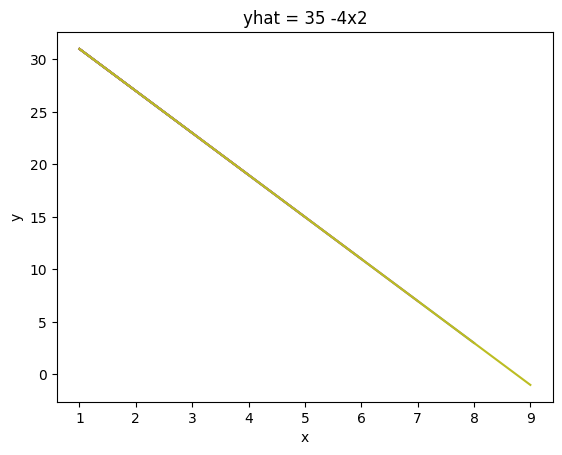

In [3]:
# yn = 5 + 3x1 - 4x2

print('a) if x1 increases by 1 unit and x2 stays constant yhat will increase by 3 units\nfor x2 states the same other way around, so will decrease by 4 units')
x = []
y = []
for i in range(1,10):
    functie = 5 + 30 -4*i
    y.append(functie)
    x.append(i)
    plt.plot(x,y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('yhat = 35 -4x2')

print('e) by increasing x1 the starting point will be higher on the y-axis')



## Opdracht 7

In [4]:
k = 3
n = 25
R2 = 0.663

# Compute R2adj R2 = 0.663
R2adj = 1 - ((n-1)/n-k-1)*(1-R2)

print(f'R2 adjustes with R2 = 0.653 = {R2adj:4f}')

#Compute F-test
F0 = R2/(1-R2) * (n-k-1)/k

print(f'F-statstic F0 = {F0:4f}')

R2 = 0.663

# Compute R2adj R2 = 0.665
R2 = 0.665
R2adj = 1 - ((n-1)/n-k-1)*(1-R2)

print(f'R2 adjustes with R2 = 0.655 = {R2adj:4f}')
# Je zou deze extra variable niet toevoegen, want met de extravariable
# Wordt de variante minder goed verklaard, wat terug te zien is in de dalende
# Waarde van R2adj

R2 adjustes with R2 = 0.653 = 2.024480
F-statstic F0 = 13.771513
R2 adjustes with R2 = 0.655 = 2.018400


## Opdracht 9

In [5]:
inputvalues = {
    'x1':[0.8,3.9,1.8,5.1,4.9,8.4,12.9,6.0,14.6,9.3],
    'x2':[2.8,2.6,2.4,2.3,2.5,2.1,2.3,2.0,2.2,1.1],
    'x3':[2.5,5.7,7.8,7.1,5.9,8.6,9.2,1.2,3.7,5.5],
    'y':[11,10.8,10.6,10.3,10.3,10.3,10,9.4,8.7,8.7]
}

# Construct dataframe
data = pd.DataFrame(inputvalues)

# Check correlation
print(data.corr())

print('\na) Rule of thumb: correlation < -0.7 or > 0.7\nSo there is nu multicorrelation between x1,x2 and x3')

# Create model
model = ols('y ~ x1 + x2 + x3', data = data).fit()

# Intercept model data
b0,b1,b2,b3 = model.params.values
print(f'\nb) b0 = {b0:4f}\nb1 = {b1:4f}\nb2 = {b2:4f}\nb3 = {b3:4f}')


# Perform F-test 
pvalue = model.f_pvalue
print(f'\nc) P-value = {pvalue} < alpha = 0.05\nDus H0 wordt verworpen ')

print(f'\nd) We zien dat voor alle variable geldt pvalue < 0.05 dus H0 wordt verworpen {model.pvalues}')


          x1        x2        x3         y
x1  1.000000 -0.459829  0.182865 -0.747863
x2 -0.459829  1.000000 -0.011583  0.787923
x3  0.182865 -0.011583  1.000000  0.258229
y  -0.747863  0.787923  0.258229  1.000000

a) Rule of thumb: correlation < -0.7 or > 0.7
So there is nu multicorrelation between x1,x2 and x3

b) b0 = 7.964700
b1 = -0.103538
b2 = 0.935911
b3 = 0.115239

c) P-value = 0.00046167204022433005 < alpha = 0.05
Dus H0 wordt verworpen 

d) We zien dat voor alle variable geldt pvalue < 0.05 dus H0 wordt verworpen Intercept    0.000006
x1           0.002509
x2           0.003385
x3           0.011165
dtype: float64


## Opdracht 10

In [6]:
inputvalues = {
    'x1': [24.9,26.7,30.6,39.6,33.1,41.1,25.4,33.8,23.5,39.8],
    'x2': [13.5,15.7,13.8,8.8,10.6,9.7,9.8,6.8,7.5,6.8],
    'x3': [3.7,11.4,15.7,8.8,18.3,21.8,16.4,25.9,15.5,30.8],
    'y': [59.8,66.3,76.5,77.1,81.9,84.6,87.3,88.5,90.7,93.4]
}

data = pd.DataFrame(inputvalues)
data.corr()

# Check correlation
print(data.corr())

print('\na) Rule of thumb: correlation < -0.7 or > 0.7\nSo there is nu multicorrelation between x1,x2 and x3')

# Create model
model = ols('y ~ x1 + x2 + x3', data = data).fit()

# Intercept model data
b0,b1,b2,b3 = model.params.values
print(f'\nb) b0 = {b0:4f}\nb1 = {b1:4f}\nb2 = {b2:4f}\nb3 = {b3:4f}')


# Perform F-test 
pvalue = model.f_pvalue
print(f'\nc) P-value = {pvalue:4F} < alpha = 0.05\nDus H0 wordt verworpen ')

print(f'\nd) We zien dat voor alle variable geldt pvalue < 0.05 behalve voor x1 dus H0 wordt niet verworpen {model.pvalues}')


model = ols('y ~ x2 + x3', data = data).fit()
# Perform F-test 
pvalue = model.f_pvalue
print(f'\ne) P-value = {pvalue:4F} < alpha = 0.05\nDus H0 wordt verworpen ')

print(f'\n We zien nu dat voor alle variable geldt pvalue < 0.05 H0 wordt verworpen {model.pvalues}')

          x1        x2        x3         y
x1  1.000000 -0.424070  0.518130  0.344354
x2 -0.424070  1.000000 -0.637916 -0.854272
x3  0.518130 -0.637916  1.000000  0.821000
y   0.344354 -0.854272  0.821000  1.000000

a) Rule of thumb: correlation < -0.7 or > 0.7
So there is nu multicorrelation between x1,x2 and x3

b) b0 = 98.872423
b1 = -0.301298
b2 = -2.045573
b3 = 0.736976

c) P-value = 0.003345 < alpha = 0.05
Dus H0 wordt verworpen 

d) We zien dat voor alle variable geldt pvalue < 0.05 behalve voor x1 dus H0 wordt niet verworpen Intercept    0.000224
x1           0.303004
x2           0.018538
x3           0.031175
dtype: float64

e) P-value = 0.001072 < alpha = 0.05
Dus H0 wordt verworpen 

 We zien nu dat voor alle variable geldt pvalue < 0.05 H0 wordt verworpen Intercept    0.000042
x2           0.019484
x3           0.039862
dtype: float64


## Opdracht 12

In [7]:
inputvalues = {
 'x1' : [47.3,53.1,56.7,48.8,42.7,44.3,44.5,37.7,36.9,28.1,32,34.7],
 'x2' : [0.9,0.8,0.8,0.5,1.1,1.1,.7,.7,1,1.8,0.8,0.8],
 'x3' : [4,6,4,7,7,6,8,7,5,6,8,10],
 'x4' : [76,55,65,67,74,76,68,79,73,68,81,68],
 'y' : [105.5,113.8,115.2,118.9,148.9,120.2,121.6,140,141.5,141.9,152.8,156.5]
}
data = pd.DataFrame(inputvalues)

# Check correlation
print(data.corr())

print('\na) Rule of thumb: correlation < -0.7 or > 0.7\nSo there is nu multicorrelation between x1,x2 and x3')


model = ols('y ~ x1 + x2 + x3 + x4',data = data).fit()
model.summary()
print('b) De f-test suggereert dat we H0 niet moeten verwerpen maar als we naar de\nt-test kijken dan zou elke variable verwopren moeten worden(Indirect)')

model = ols('y ~ x1 + x3',data = data).fit()
model.summary()
print('c) Je blijft over met variable x1 en x2')

new_data = pd.DataFrame({
    'x1': [44.3],
    'x2': [1.1],
    'x3': [7],
    'x4': [69]
})

prediction = model.get_prediction(new_data)
print(prediction.summary_frame(alpha=0.05))


          x1        x2        x3        x4         y
x1  1.000000 -0.505918 -0.471059 -0.503597 -0.807573
x2 -0.505918  1.000000 -0.224670  0.047975  0.251745
x3 -0.471059 -0.224670  1.000000  0.073452  0.640189
x4 -0.503597  0.047975  0.073452  1.000000  0.382910
y  -0.807573  0.251745  0.640189  0.382910  1.000000

a) Rule of thumb: correlation < -0.7 or > 0.7
So there is nu multicorrelation between x1,x2 and x3
b) De f-test suggereert dat we H0 niet moeten verwerpen maar als we naar de
t-test kijken dan zou elke variable verwopren moeten worden(Indirect)
c) Je blijft over met variable x1 en x2
         mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  130.366381  3.20745     123.110626     137.622136    107.069655   

   obs_ci_upper  
0    153.663106  


C:\Users\Youpk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Youpk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Opdracht 15

In [8]:
inputvalues = {
 'x1' : [15,15,15,0,0,-5,-5,-10,-10,-15,-15,-15,5,10],
 'x2' : [10,15,25,5,20,10,25,15,20,25,35,50,40,45],
 'y' : [3,0,-4,-11,-22,-22,-31,-32,-35,-44,-48,-52,-22,-16]
}

# Create model
model = ols('y ~ x1 + x2 ', data = data).fit()

# Intercept model data
b0,b1,b2 = model.params.values
print(f'\nb) b0 = {b0:4f}\nb1 = {b1:4f}\nb2 = {b2:4f}')



b) b0 = 219.291433
b1 = -1.838784
b2 = -11.163749


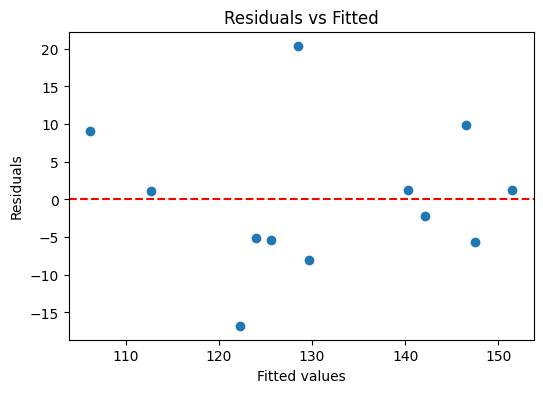

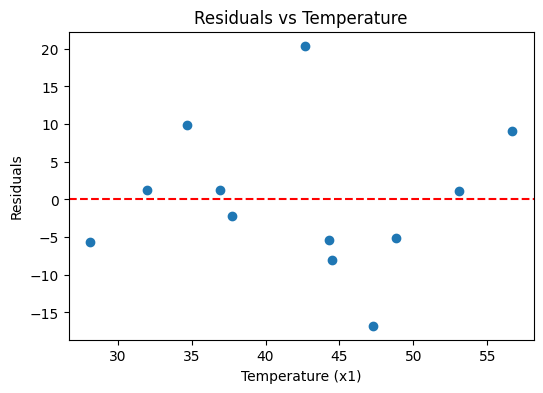

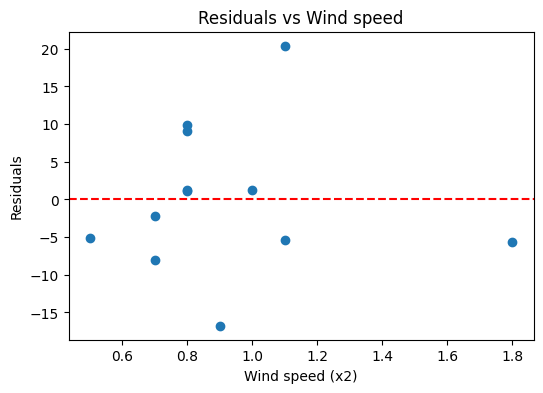

In [9]:
import matplotlib.pyplot as plt

# Residuals ophalen
residuals = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Residuals vs Temperature (x1)
plt.figure(figsize=(6,4))
plt.scatter(data['x1'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Temperature (x1)")
plt.ylabel("Residuals")
plt.title("Residuals vs Temperature")
plt.show()

# Residuals vs Wind speed (x2)
plt.figure(figsize=(6,4))
plt.scatter(data['x2'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Wind speed (x2)")
plt.ylabel("Residuals")
plt.title("Residuals vs Wind speed")
plt.show()


## Opdracht 17

In [10]:
values = {
 'x1' : [4.5,4.25,3,4,3.75,2.5,4,5,4.5,5,2.5],
 'x2' : [2330,2640,3360,1770,2590,3080,2050,2220,2240,2510,2250],
 'y' : [4025,2535,4985,3890,3810,4685,3765,3350,3610,3875,4475]
}
data = pd.DataFrame(values)

x = data[['x1','x2']]
y = data['y']
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()


b0,b1,b2 = model.params.values
R2 = model.rsquared
R2adj = model.rsquared_adj

model.summary()
# X2 niet goed 
model = ols('y ~ x1 + x2',data=data).fit()
input = {
    'x1':[3.5],
    'x2':[2450]
}

new = pd.DataFrame(input)
prediction = model.get_prediction(new)
print(prediction.summary_frame(alpha=0.05))

         mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  4094.07981  182.246587    3673.818427    4514.341192   2802.073277   

   obs_ci_upper  
0   5386.086342  


C:\Users\Youpk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Youpk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


## Opdracht 18

In [11]:
Values = {
 'x1' : [21,14,4,16,12,20,25,8,24,28,4,15],
 'x2' : [6,3,8,8,4,4,1,3,12,9,11,4],
 'y' : [34.7,17.9,22.7,63.1,33,41.4,20.7,14.6,97.3,72.1,49.1,52]
}

data = pd.DataFrame(Values)

data.corr()
# nee

model = ols('y ~ x1 + x2',data=data).fit()

b0,b1,b2 = model.params.values
print(f'Model: y = {b0:4f} + {b1:4f}*x1 + {b2:4f}*x2')

residuals = model.resid

R2 = model.rsquared
R2adj = model.rsquared_adj
print('R2',R2)
print('R2adj = ', R2adj)


pvalue = model.f_pvalue
print(f'{pvalue} < 0.05 niks aan de hand')

model.summary()
# Ook niks aan de hand 

inputvalues = {
    'x1':[12],
    'x2':[4]
}

new = pd.DataFrame(inputvalues)

prediction = model.get_prediction(new)
prediction.summary_frame(alpha=0.05)

Model: y = -15.247809 + 1.544909*x1 + 5.568439*x2
R2 0.8160037744971356
R2adj =  0.7751157243853879
0.0004916319658913703 < 0.05 niks aan de hand


C:\Users\Youpk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25.564857,4.425454,15.553785,35.575929,-2.98733,54.117045


## Opdracht 19

## Opdracht 20

In [ ]:
# Je kan dan nog steeds hebben dat er minstens een bi gelijk is aan nul
# Daarom volgen we dit ook nog op met de f-test

## Opdracht 22

In [14]:
# Je kan beter R2 ADj gebruiken, omdat deze corrigeert voor het feit dat er meerdere variable toegevoegd worden
# Bij R2 is het namelijk zo dat hij omhoog gaat bij meer variable en lijkt het dus of het model betere variantie heeft
# Terwijl dit niet het geval is 